# Fire Incidents in California 2013-2020 Data Explorataion and Visualizations

Data Sources: 2013-2020 Wildfire Incidence Data https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020 ACS 2019 Housing Tenure by California County https://censusreporter.org/data/table/?table=B25003&geo_ids=140|31000US41940&primary_geo_id=31000US41940#

First I will import relevant libraries and bring in the wildfire data I want to examine. This notebook focuses 

In [1]:
import pandas as pd 
import geopandas as gpd 
import contextily as ctx 
import matplotlib.pyplot as plt
import numpy as np
import plotly 
import seaborn as sns
from pointpats import PointPattern 
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
firedata = pd.read_csv('California_Fire_Incidents.csv')

I want to see a sample of what the CSV looks like: 

In [5]:
firedata.sample(5)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
1336,12.0,False,CAL FIRE Shasta - Trinity Unit,NaN,2018,True,/incidents/2018/10/14/tower-fire/,NaN,NaN,Shasta,...,"October 2018, Tower Fire, Shasta Unit, Shasta ...",2018-10-14T06:45:00Z,Finalized,NaN,NaN,NaN,NaN,a8f54d41-fc8c-476c-9122-f1357aa166a0,2019-01-04T08:54:00Z,NaN
1058,229651.0,False,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",NaN,2018,True,/incidents/2018/7/23/carr-fire/,"Although full containment has been achieved, f...",NaN,Shasta,...,"Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,Finalized,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z,31.0
277,6.0,False,CAL FIRE / Napa County Fire,NaN,2014,True,/incidents/2014/8/24/south-napa-earthquake/,NaN,NaN,Napa,...,"Napa, Earthquake, American Canyon, south napa",2014-08-24T03:20:00Z,Finalized,NaN,NaN,NaN,NaN,9617f422-bb7b-41ae-8ad6-670ffff875ab,2014-08-31T18:00:00Z,NaN
1089,2995.0,False,Kings County Fire Department,NaN,2018,False,/incidents/2018/8/6/five-fire/,NaN,NaN,Kings,...,"Five Fire, Kings County, August 6, 2018",2018-08-06T17:29:00Z,Finalized,NaN,NaN,NaN,NaN,0ba9a90d-6615-4fa8-9a10-3efb660437ca,2019-01-04T09:23:00Z,NaN
693,1083.0,False,Kern County Fire,NaN,2017,True,/incidents/2017/7/18/hudson-fire/,NaN,NaN,Kern,...,"Hudson fire, Kern County, July 18",2017-07-18T11:45:00Z,Finalized,NaN,NaN,NaN,NaN,27759042-9df3-4d57-951e-f5727bcf013f,2018-01-09T11:59:00Z,NaN


I'm dropping columns I won't be using or find informative for the purposes of this project: 

In [3]:
firedata = firedata.drop(columns=['Active','Status','ConditionStatement','ControlStatement','AirTankers',
                       'CanonicalUrl','Featured','Final','PercentContained','Dozers','Engines',
                       'Helicopters','WaterTenders','CrewsInvolved','Extinguished','Fatalities',
                       'FuelType','Injuries','PersonnelInvolved','Public'])


In [4]:
firedata

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z
3,27440.0,Tahoe National Forest,2013,False,Placer,31,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z
1632,2.0,CAL FIRE Nevada-Yuba-Placer Unit,2019,True,Nevada,29,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z
1633,NaN,Yolo County Fire Protection District,2019,False,Yolo,57,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,False,Cashe Fire,"The Cashe Fire started November 25, 2019 off C...",NaN,2019-11-25T12:02:02Z,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z
1634,NaN,Camp Pendleton Marine Corps Base,2019,False,San Diego,37,33.351145,"Near Basilone Road and Las Pulgas Road, near C...",-117.403719,False,Oak Fire,"The Oak Fire started October 22, 2019 off near...",NaN,2019-10-22T19:20:44Z,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z


Next I'll drop any points that don't have the longitude set to zero, to get rid of values outside of California

In [7]:
firedata.drop(firedata[firedata.Longitude==0].index,inplace=True)

In [10]:
firedata

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z
3,27440.0,Tahoe National Forest,2013,False,Placer,31,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z
5,22992.0,Sierra National Forest,2013,False,Fresno,10,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,The Aspen Fire burned in July 2013 seven miles...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z
1632,2.0,CAL FIRE Nevada-Yuba-Placer Unit,2019,True,Nevada,29,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z
1633,NaN,Yolo County Fire Protection District,2019,False,Yolo,57,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,False,Cashe Fire,"The Cashe Fire started November 25, 2019 off C...",NaN,2019-11-25T12:02:02Z,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z
1634,NaN,Camp Pendleton Marine Corps Base,2019,False,San Diego,37,33.351145,"Near Basilone Road and Las Pulgas Road, near C...",-117.403719,False,Oak Fire,"The Oak Fire started October 22, 2019 off near...",NaN,2019-10-22T19:20:44Z,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z


Next I'll drop any null values under the Structures Destroyed Column, because I want to use this dataset to understand any patterns behind wildfire damage, this includes structures destroyed and acres burned. Structures destroyed can tell us more about socioeconomic impacts, so I'm going to use the available data to shape the dataset im working with.

In [11]:
sddf = firedata.dropna(subset=['StructuresDestroyed'])

In [12]:
sddf 

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z
10,8073.0,CAL FIRE Shasta-Trinity Unit,2013,True,Shasta,45,40.498332,"Community of Igo, 10 miles southwest of Redding",-122.535496,True,Clover Fire,The Clover Fire burned September 2013 near the...,"Clover Fire, September 2013, Shasta County, Ig...",2013-09-09T12:32:00Z,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,2013-09-15T07:30:00Z
11,7055.0,CAL FIRE San Diego Unit / Cleveland National F...,2013,True,San Diego,37,32.954350,"off Sunrise Hwy, 9 miles southeast of Julian",-116.473810,True,Chariot Fire,Chariot Fire burned in July 2013 off Sunrise H...,"Chariot Fire, July 2013, Sunrise Hwy, Julian, ...",2013-07-06T12:55:00Z,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,2013-07-15T06:15:00Z
15,3505.0,CAL FIRE Sonoma-Lake-Napa Unit,2013,True,Sonoma,49,38.816700,"The Geysers area, 10 miles northeast of Geyser...",-122.849800,True,McCabe Fire,The McCabe Fire is burning in The Geysers area...,"The Geysers area, Cloverdale, Sonoma County, M...",2013-11-22T02:04:00Z,NaN,1.0,NaN,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,2013-11-27T18:15:00Z
16,3166.0,CAL FIRE/Riverside County Fire,2013,True,Riverside,33,34.288877,Mias Canyon and Bluff Road in Banning,-116.941311,True,Summit Fire,The Summit Fire burned in May 2013 near Mias C...,"Summit Fire, May 2013, Mias Canyon, Banning, R...",2013-05-01T12:38:00Z,NaN,1.0,NaN,NaN,a1b14be5-a8cf-4e40-8588-96becf4c5879,2013-05-04T18:30:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,350.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.975405,"Reche Canyon Rd and Jordan Dr, Moreno Valley",-117.207068,True,Reche Fire,The Reche Vegetation Fire started on October 1...,NaN,2019-10-10T14:18:17Z,1.0,1.0,NaN,NaN,8739a46c-9d9b-464c-87d0-31738601d96f,2019-10-14T10:56:50.567Z
1462,220.0,Los Padres National Forest,2019,False,San Luis Obispo,40,35.214364,"Upper Lopez Canyon Road & Wittenberg Creek Rd,...",-120.455883,True,Lopez Fire,"The Lopez Fire started on September 9, 2019 of...",NaN,2019-09-21T14:26:00Z,NaN,0.0,NaN,24.0,840010ca-aef0-4f91-b771-3bf196317d03,2019-10-24T11:23:10.07Z
1518,85.0,CAL FIRE Amador - El Dorado Unit,2019,True,El Dorado,9,38.898915,"Highway 193 and Penobscot Rd, east of Cool",-120.946657,True,Country Fire,"The Country Fire started on September 3, 2019 ...",NaN,2019-09-03T14:57:31Z,NaN,4.0,NaN,NaN,89008310-149d-480f-946f-4ce5a2a71c3f,2019-09-08T18:11:21.837Z
1549,53.0,CAL FIRE Sonoma Lake Napa Unit,2019,True,Lake,17,38.955024,"Highway 29 and Cole Creek Road, South of Kelse...",-122.833831,False,Oak Fire,"The Oak Fire started September 7, 2019 off Hig...",NaN,2019-09-07T14:00:00Z,NaN,1.0,NaN,NaN,25e65946-2e28-453b-bcb4-617b623be750,2019-09-08T07:45:11.27Z


Since the table is organized by County and Name of the fire, and a single fire can span multiple counties, I am dropping duplicates by name, as the lat/long information is the same

In [13]:
sddf1 = sddf.drop_duplicates(subset=['Name'])

In [14]:
sddf1

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z
10,8073.0,CAL FIRE Shasta-Trinity Unit,2013,True,Shasta,45,40.498332,"Community of Igo, 10 miles southwest of Redding",-122.535496,True,Clover Fire,The Clover Fire burned September 2013 near the...,"Clover Fire, September 2013, Shasta County, Ig...",2013-09-09T12:32:00Z,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,2013-09-15T07:30:00Z
11,7055.0,CAL FIRE San Diego Unit / Cleveland National F...,2013,True,San Diego,37,32.954350,"off Sunrise Hwy, 9 miles southeast of Julian",-116.473810,True,Chariot Fire,Chariot Fire burned in July 2013 off Sunrise H...,"Chariot Fire, July 2013, Sunrise Hwy, Julian, ...",2013-07-06T12:55:00Z,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,2013-07-15T06:15:00Z
15,3505.0,CAL FIRE Sonoma-Lake-Napa Unit,2013,True,Sonoma,49,38.816700,"The Geysers area, 10 miles northeast of Geyser...",-122.849800,True,McCabe Fire,The McCabe Fire is burning in The Geysers area...,"The Geysers area, Cloverdale, Sonoma County, M...",2013-11-22T02:04:00Z,NaN,1.0,NaN,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,2013-11-27T18:15:00Z
16,3166.0,CAL FIRE/Riverside County Fire,2013,True,Riverside,33,34.288877,Mias Canyon and Bluff Road in Banning,-116.941311,True,Summit Fire,The Summit Fire burned in May 2013 near Mias C...,"Summit Fire, May 2013, Mias Canyon, Banning, R...",2013-05-01T12:38:00Z,NaN,1.0,NaN,NaN,a1b14be5-a8cf-4e40-8588-96becf4c5879,2013-05-04T18:30:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,600.0,CAL FIRE Shasta-Trinity Unit,2019,True,Shasta,45,40.715556,"Bear Mountain Road and Dry Creek Road, north o...",-122.241944,True,Mountain Fire,"The Mountain Fire started August 22, 2019 off ...",NaN,2019-08-22T11:02:09Z,7.0,14.0,NaN,NaN,1bf3e829-5fb3-43d2-9179-6c337709df19,2019-10-02T16:06:52.9Z
1436,526.0,Unified Command: CAL FIRE Sonoma-Lake-Napa Uni...,2019,True,Napa,28,38.165873,"American Canyon and Highway 80, east of Americ...",-122.211671,False,American Fire,"The American Fire started on October 6, 2019 o...",NaN,2019-10-06T16:36:50Z,NaN,1.0,NaN,NaN,74c3d01f-8809-40bc-a0e2-b1cc24bf1a7d,2019-10-09T13:52:17.697Z
1445,350.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.975405,"Reche Canyon Rd and Jordan Dr, Moreno Valley",-117.207068,True,Reche Fire,The Reche Vegetation Fire started on October 1...,NaN,2019-10-10T14:18:17Z,1.0,1.0,NaN,NaN,8739a46c-9d9b-464c-87d0-31738601d96f,2019-10-14T10:56:50.567Z
1462,220.0,Los Padres National Forest,2019,False,San Luis Obispo,40,35.214364,"Upper Lopez Canyon Road & Wittenberg Creek Rd,...",-120.455883,True,Lopez Fire,"The Lopez Fire started on September 9, 2019 of...",NaN,2019-09-21T14:26:00Z,NaN,0.0,NaN,24.0,840010ca-aef0-4f91-b771-3bf196317d03,2019-10-24T11:23:10.07Z


Next, I want to turn this dataframe into a geodataframe that has a geometry column I can use to map points.

In [15]:
firegdf = gpd.GeoDataFrame(
    sddf1, geometry=gpd.points_from_xy(sddf1.Longitude, sddf1.Latitude))

When I originally tried to use the 'firegdf' geodataframe to map points, I received a projection error, because there was a point included in the dataset with a longitude outside of California, somwhere in the Pacific Ocean. I checked what the framing latitude and longitudes were for the State of California and found the one point in the dataframe outside of those boundaries and dropped it (index number 376). 

In [16]:
fireclean = firegdf.drop([376])

Then I plotted the geodataframe just to get a sense of the point distribution. 

<AxesSubplot:>

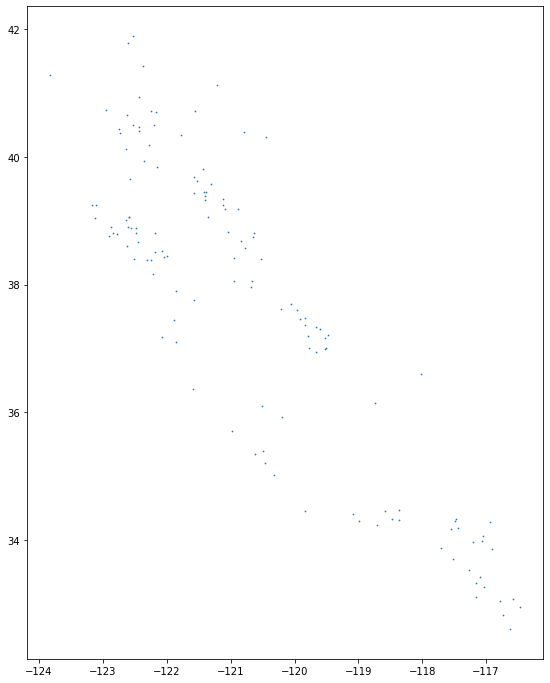

In [18]:
fireclean.plot(figsize=(12,12),
             markersize=0.5)


I wanted to create a point chloropleth map of structures destroyed between 2013-2020

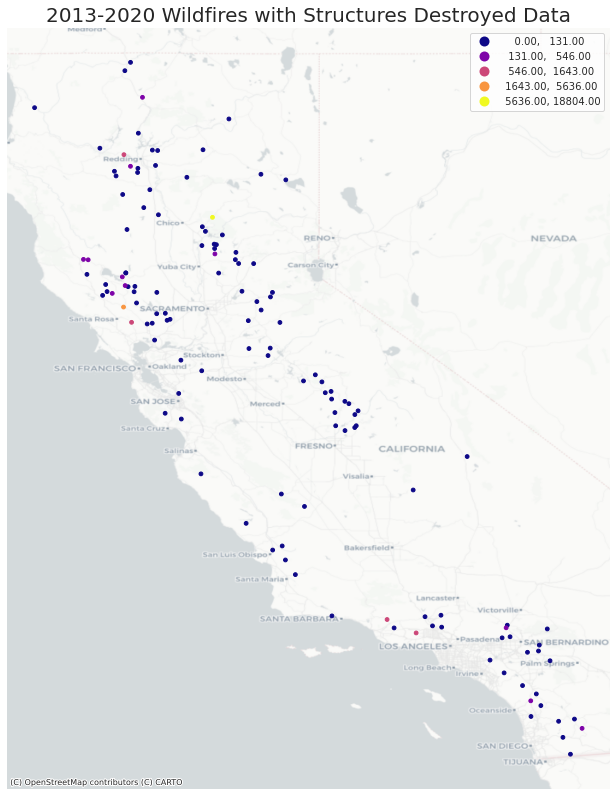

In [23]:
ax = fireclean.plot(figsize=(15,14), markersize=14,
                  column='StructuresDestroyed',
                  legend=True,
                  scheme='NaturalBreaks',
                   cmap='plasma')

# title (including count)
ax.set_title('2013-2020 Wildfires with Structures Destroyed Data',fontsize=20)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4324',
                source=ctx.providers.CartoDB.Positron)

And similarly wanted to see the distribution of acres burned between 2013-2020

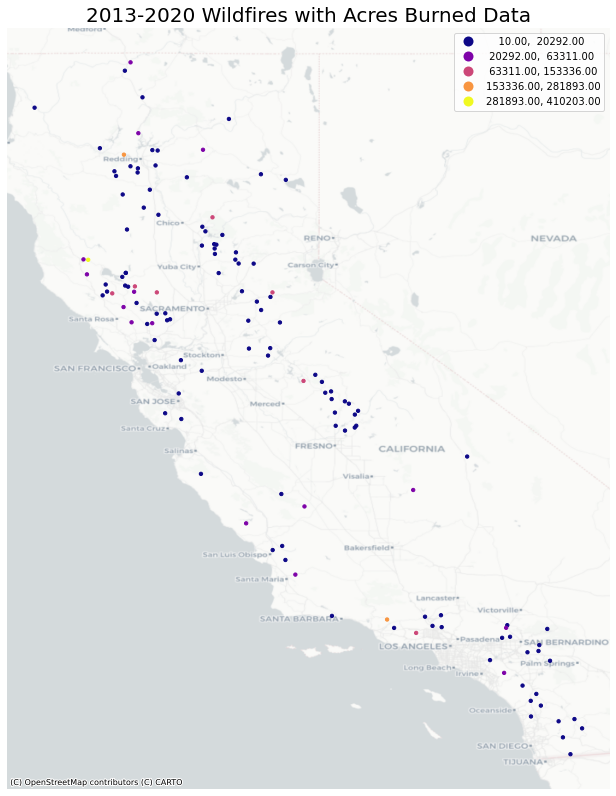

In [20]:



ax = fireclean.plot(figsize=(14,14), markersize=11,
                  column='AcresBurned',
                  legend=True,
                  scheme='NaturalBreaks',
                 cmap='plasma')

# title (including count)
ax.set_title('2013-2020 Wildfires with Acres Burned Data',fontsize=20)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4324',
                source=ctx.providers.CartoDB.Positron)

We also wanted to conduct point pattern analysis of the wildfire data to explore other visualizations of wildfire origin locations 

Text(0.5, 1.0, '2013-2020 Wildfires by County')

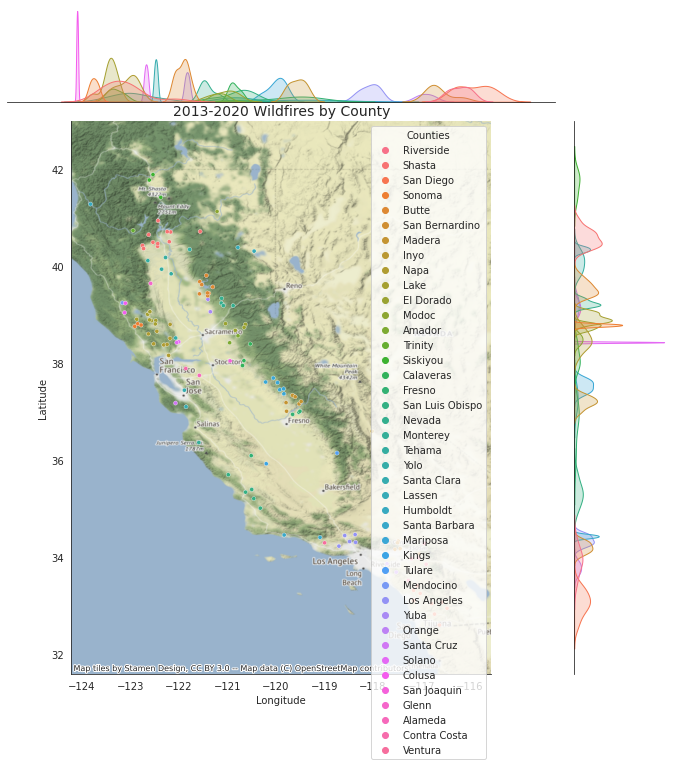

In [21]:
sns.set_style('white')
g = sns.jointplot(data = fireclean,
                  x='Longitude', 
                  y='Latitude',
                  hue='Counties',
                  s=17,
                  height=10 
                 )

ctx.add_basemap(g.ax_joint,
                crs='epsg:4324')

g.ax_joint.set_title('2013-2020 Wildfires by County',fontsize=14)


The two maps below show distribution of structures destroyed and acres burned

Text(0.5, 1.0, '2013-2020 Structures Destroyed by Wildfires')

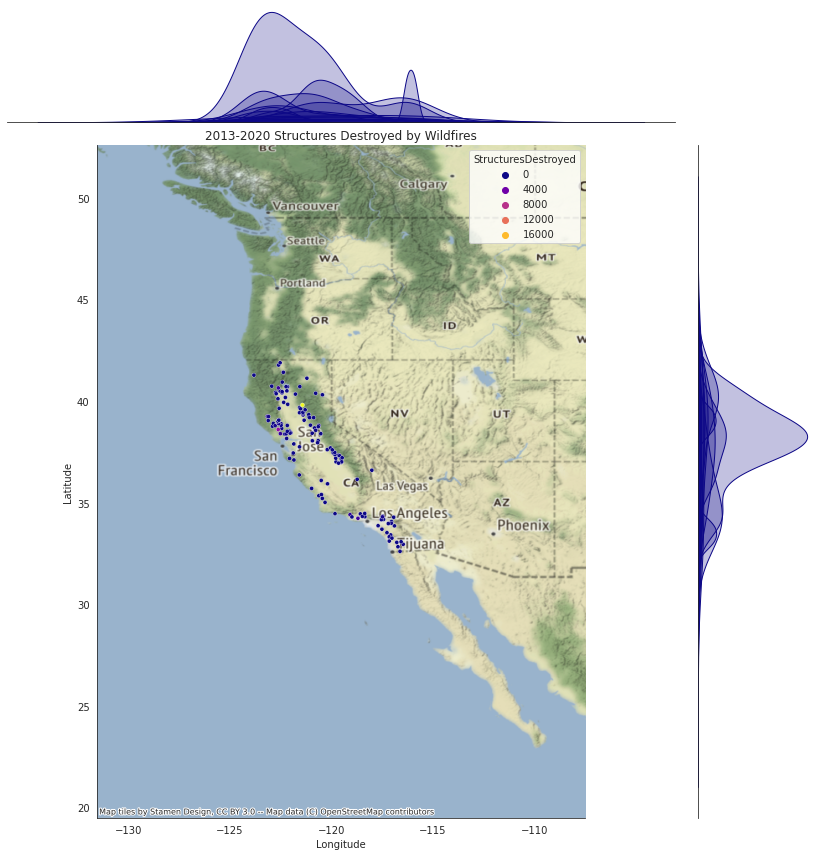

In [21]:
sns.set_style('white')
g = sns.jointplot(data = fireclean,
                  x='Longitude', 
                  y='Latitude',
                  hue='StructuresDestroyed',
                  s=17,
                  height=12,
                  palette='plasma'
                 )

ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

g.ax_joint.set_title('2013-2020 Structures Destroyed by Wildfires')

Text(0.5, 1.0, '2013-2020 Acres Burned by Wildfires')

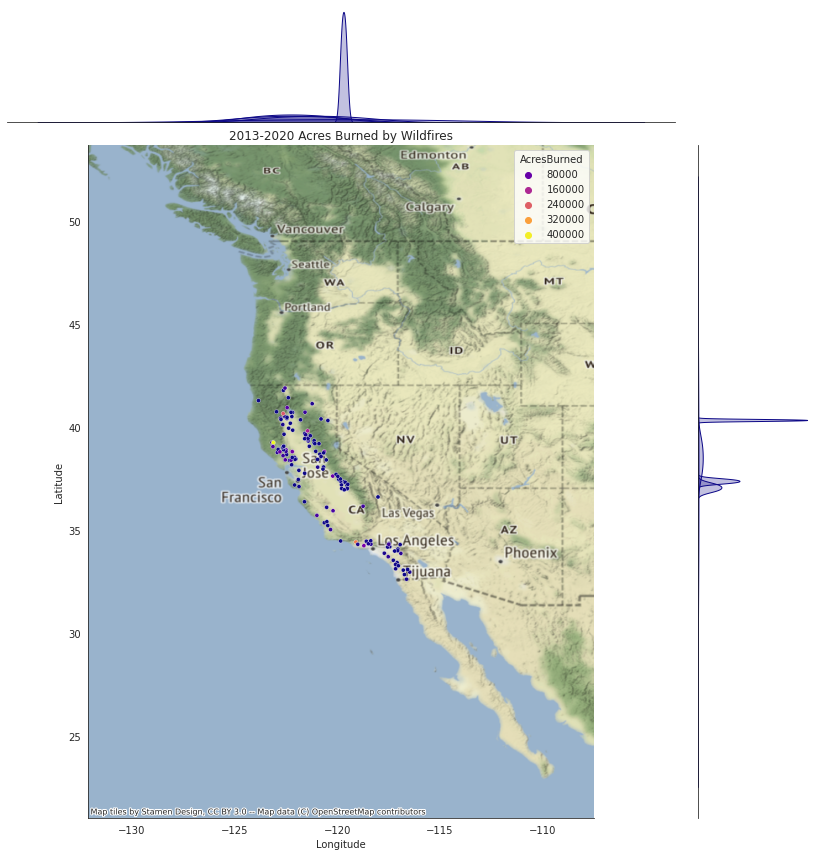

In [142]:
sns.set_style('white')
g = sns.jointplot(data = fireclean,
                  x='Longitude', 
                  y='Latitude',
                  hue='AcresBurned',
                  s=17,
                  height=12,
                  palette='plasma'
                 )

ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')
g.ax_joint.set_title('2013-2020 Acres Burned by Wildfires')

We also wanted to see the central tendencies of the fires, which you can see below.

In [30]:
import numpy as np
from pointpats import PointPattern
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse

mean_center = mean_center(fireclean[['Longitude','Latitude']])
med_center = euclidean_median(fireclean[['Longitude','Latitude']])

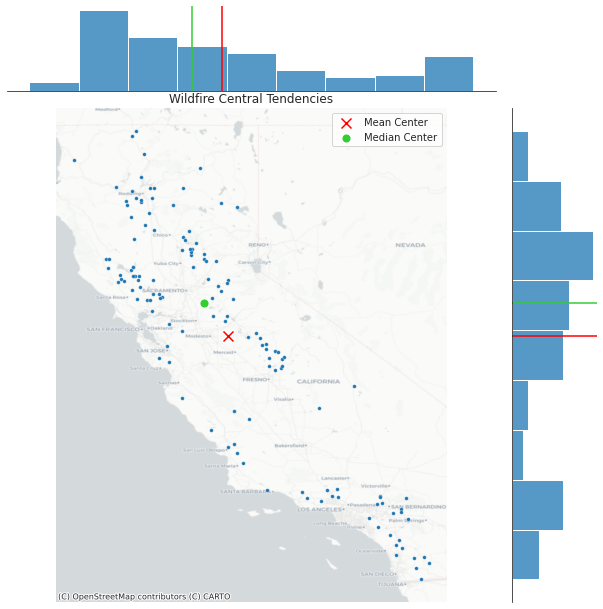

In [31]:
g = sns.jointplot(
    x='Longitude', y='Latitude', data=fireclean, s=14, height=9
)

g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=100, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

g.ax_joint.legend()
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

g.ax_joint.set_axis_off()
g.ax_joint.set_title('Wildfire Central Tendencies',fontsize=12)
plt.show()

